In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/data_integration/"
)
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [3]:
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

### Load separate data sources (after scrublet and QC, raw counts, LM only)

In [4]:
print("Loading datasets: ")
# multiome
adata_multiome = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/scrublet_qc/CRC_LM_decon_raw_scrublet_qc.h5ad"
)
print("Multiome: ", adata_multiome.shape)
print(set(adata_multiome.obs.Tissue))

# Che2021
adata_che2021 = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/scrublet_qc/Che2021_CRC_LM_raw_scrublet_qc.h5ad"
)
print("Che2021: ", adata_che2021.shape)
print(set(adata_che2021.obs.Tissue))

# Wu2022
adata_wu2022 = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/scrublet_qc/Wu2022_CRC_LM_raw_scrublet_qc.h5ad"
)
print("Wu2022: ", adata_wu2022.shape)
print(set(adata_wu2022.obs.Tissue))

Loading datasets: 
Multiome:  (5345, 36485)
{'LM'}
Che2021:  (48954, 33578)
{'LM'}
Wu2022:  (53129, 20497)
{'LM'}


### Look at what is in .obs to select common columns

In [5]:
adata_multiome

AnnData object with n_obs × n_vars = 5345 × 36485
    obs: 'orig.ident', 'total_counts', 'n_genes_by_counts', 'Sample', 'Patient', 'Therapy', 'Tissue', 'TSSEnrichment', 'nFrags', 'pct_counts_mt', 'pct_counts_ribo', 'RNA_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.5', 'Clusters_all_cells_preDecon', 'Cell_type_preDecon', 'ident', 'doublet_score', 'decontX_clusters', 'integratedRNADecon_snn_res.0.5', 'X_scvi_batch', 'X_scvi_labels', 'leiden', 'Cell_type', 'nCount_Peaks', 'nFeature_Peaks', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_integratedRNADecon', 'nFeature_integratedRNADecon', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.5', 'Cell_subtype'
    obsm: 'X_ATAC', 'X_UMAP', 'X_WNN'

In [6]:
adata_che2021

AnnData object with n_obs × n_vars = 48954 × 33578
    obs: 'Patient', 'Tissue', 'Therapy', 'Cell_type', 'Cell_subtype', 'Sample', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [7]:
adata_wu2022

AnnData object with n_obs × n_vars = 53129 × 20497
    obs: 'Sample', 'nCount_RNA', 'nFeature_RNA', 'patient', 'tissue', 'patient_tissue', 'tissueunique', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.1', 'doublet', 'RNA_snn_res.1', 'Cell_type', 'Cell_subtype', 'chemo', 'Therapy', 'Patient', 'Tissue', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Look at what is in .var to select common columns

In [8]:
adata_multiome.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [9]:
adata_che2021.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
RP11-34P13.3,ENSG00000243485,Gene Expression,False,False,0,0.000000,100.000000,0.0
FAM138A,ENSG00000237613,Gene Expression,False,False,0,0.000000,100.000000,0.0
OR4F5,ENSG00000186092,Gene Expression,False,False,0,0.000000,100.000000,0.0
RP11-34P13.7,ENSG00000238009,Gene Expression,False,False,32,0.000590,99.940980,32.0
RP11-34P13.8,ENSG00000239945,Gene Expression,False,False,4,0.000074,99.992623,4.0
...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,False,9,0.000387,99.983401,21.0
AC233755.1,ENSG00000275063,Gene Expression,False,False,6,0.000111,99.988934,6.0
AC240274.1,ENSG00000271254,Gene Expression,False,False,182,0.003412,99.664324,185.0
AC213203.1,ENSG00000277475,Gene Expression,False,False,0,0.000000,100.000000,0.0


In [10]:
adata_wu2022.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
features,,,,,,
AL627309.1,False,False,26,0.000471,99.952937,26.0
FAM87B,False,False,35,0.000706,99.936646,39.0
LINC00115,False,False,611,0.011657,98.894018,644.0
FAM41C,False,False,481,0.008924,99.129333,493.0
SAMD11,False,False,39,0.000706,99.929405,39.0
...,...,...,...,...,...,...
AC007325.4,False,False,487,0.008996,99.118472,497.0
AL354822.1,False,False,150,0.002769,99.728482,153.0
AC233755.2,False,False,7,0.000905,99.987329,50.0


### Since multiome has no columns in `.var`, let's remove the columns in the other two dataframes

In [11]:
adata_che2021.var.drop(columns=list(adata_che2021.var.columns), inplace=True)

In [12]:
adata_wu2022.var.drop(columns=list(adata_wu2022.var.columns), inplace=True)

In [13]:
adata_che2021.var

""
RP11-34P13.3
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [14]:
adata_wu2022.var

""
features
AL627309.1
FAM87B
LINC00115
FAM41C
SAMD11
...
AC007325.4
AL354822.1
AC233755.2


### Select only relevant columns

In [15]:
def format_adata(adata):
    """Select only relevant info for merging datasets, assumes raw is in .X"""
    return ad.AnnData(
        X=adata.X.copy(),  # take raw counts
        obs=adata.obs[
            [
                "Patient",
                "Sample",
                "Cell_type",
                "Cell_subtype",
                "Tissue",
                "Therapy",
                "doublet_score",
                "n_genes_by_counts",
                "total_counts",
                "pct_counts_mt",
                "pct_counts_ribo",
            ]
        ],
        var=adata.var  # [
        # [
        #   "n_cells_by_counts",
        #  "total_counts",
        #  "mean_counts",
        # "pct_dropout_by_counts",
        # ]
        # ],
    )

In [16]:
adata_multiome_format = format_adata(adata_multiome)
adata_multiome_format

AnnData object with n_obs × n_vars = 5345 × 36485
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'

In [17]:
adata_che2021_format = format_adata(adata_che2021)
adata_che2021_format

AnnData object with n_obs × n_vars = 48954 × 33578
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'

In [18]:
adata_wu2022_format = format_adata(adata_wu2022)
adata_wu2022_format

AnnData object with n_obs × n_vars = 53129 × 20497
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'

### Check that the data is raw 

In [19]:
np.max(adata_multiome_format.X)

11459.0

In [20]:
np.max(adata_che2021_format.X)

23832.0

In [21]:
np.max(adata_wu2022_format.X)

40676.0

In [22]:
adata_multiome_format.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [23]:
adata_che2021_format.var

""
RP11-34P13.3
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [24]:
adata_wu2022_format.var

""
features
AL627309.1
FAM87B
LINC00115
FAM41C
SAMD11
...
AC007325.4
AL354822.1
AC233755.2


### Merge all datasets into single adata 

In [25]:
adata_liver = adata_multiome_format.concatenate(
    adata_che2021_format,
    adata_wu2022_format,
    batch_key="cell_source",
    batch_categories=["BCI-Nuclei", "Che-Cells", "Wu-Cells"],
    join="outer",
)

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [26]:
adata_liver.shape

(107428, 48245)

In [27]:
adata_liver

AnnData object with n_obs × n_vars = 107428 × 48245
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'cell_source'

In [28]:
# set dtype of .obs variables to category
adata_liver.obs["Tissue"] = adata_liver.obs["Tissue"].astype("category")
adata_liver.obs["Therapy"] = adata_liver.obs["Therapy"].astype("category")
adata_liver.obs["cell_source"] = adata_liver.obs["cell_source"].astype("category")
adata_liver.obs["Cell_type"] = adata_liver.obs["Cell_type"].astype("category")
adata_liver.obs["Cell_subtype"] = adata_liver.obs["Cell_subtype"].astype("category")
adata_liver.obs["Patient"] = adata_liver.obs["Patient"].astype("category")
adata_liver.obs["Sample"] = adata_liver.obs["Sample"].astype("category")

In [29]:
sc.pp.filter_genes(
    adata_liver, min_cells=1
)  # just to reduce the size of the data, remove genes that have no cells

In [30]:
adata_liver

AnnData object with n_obs × n_vars = 107428 × 37102
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells'

In [31]:
adata_liver.obs

,Patient,Sample,Cell_type,Cell_subtype,Tissue,Therapy,doublet_score,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo,cell_source
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei,CRC01,CRC01_LM,Myeloid,No annotation,LM,NAC,0.001115,727,981.0,3.771662,1.630989,BCI-Nuclei
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei,CRC01,CRC01_LM,Myeloid,No annotation,LM,NAC,0.002359,365,461.0,1.301518,4.555315,BCI-Nuclei
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei,CRC01,CRC01_LM,Myeloid,No annotation,LM,NAC,0.011868,1363,1710.0,2.456140,5.672515,BCI-Nuclei
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei,CRC01,CRC01_LM,Endothelial,No annotation,LM,NAC,0.000901,983,1220.0,2.377049,1.557377,BCI-Nuclei
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei,CRC01,CRC01_LM,Endothelial,No annotation,LM,NAC,0.000203,5086,10885.0,2.351860,1.341295,BCI-Nuclei
...,...,...,...,...,...,...,...,...,...,...,...,...
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells,Wu2021_P8,P8_Liver_T,Plasma,IGHG+ Plasma B cells,LM,naive,0.133690,2624,17023.0,2.202902,20.178581,Wu-Cells
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells,Wu2021_P15,P15_Liver_T,Plasma,IGHA+ Plasma B cells,LM,NAC,0.132075,903,3453.0,2.114104,16.999712,Wu-Cells
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells,Wu2021_P17,P17_Liver_T,Plasma,IGHG+ Plasma B cells,LM,naive,0.148265,1680,7002.0,3.313339,13.938874,Wu-Cells
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells,Wu2021_P18,P18_Liver_T,Plasma,IGHA+ Plasma B cells,LM,NAC,0.203540,776,2594.0,9.483423,3.700848,Wu-Cells


In [32]:
adata_liver.var

,n_cells
A1BG,15552
A1BG-AS1,1504
A1CF,536
A2M,7274
A2M-AS1,2075
...,...
ZYX,19380
ZZEF1,6826
ZZZ3,1537
bP-21264C1.2,57


In [33]:
# check if data contains MT genes
adata_liver.var_names.str.startswith("MT-").any()

False

In [34]:
# check if data contains ribosomal genes
adata_liver.var_names.str.startswith(("RPS", "RPL")).any()

False

### Set colours for dataset, use file colours excel 

`Che: #8da0cb
 Wu:  #fc8d62
 Multiome: #66c2a5`

In [35]:
# set colours for dataset, need to know order
adata_liver.obs.cell_source.cat.categories.values.tolist()

['BCI-Nuclei', 'Che-Cells', 'Wu-Cells']

In [36]:
adata_liver.uns["cell_source_colors"] = ["#66c2a5", "#8da0cb", "#fc8d62"]

In [37]:
# set colours for therapy
adata_liver.obs.Therapy.cat.categories

Index(['NAC', 'naive'], dtype='object')

In [38]:
adata_liver.uns["Therapy_colors"] = ["#ff7f00", "#377eb8"]

In [39]:
# set colour for tissue: here only CRC so
adata_liver.uns["Tissue_colors"] = ["#e31a1c"]

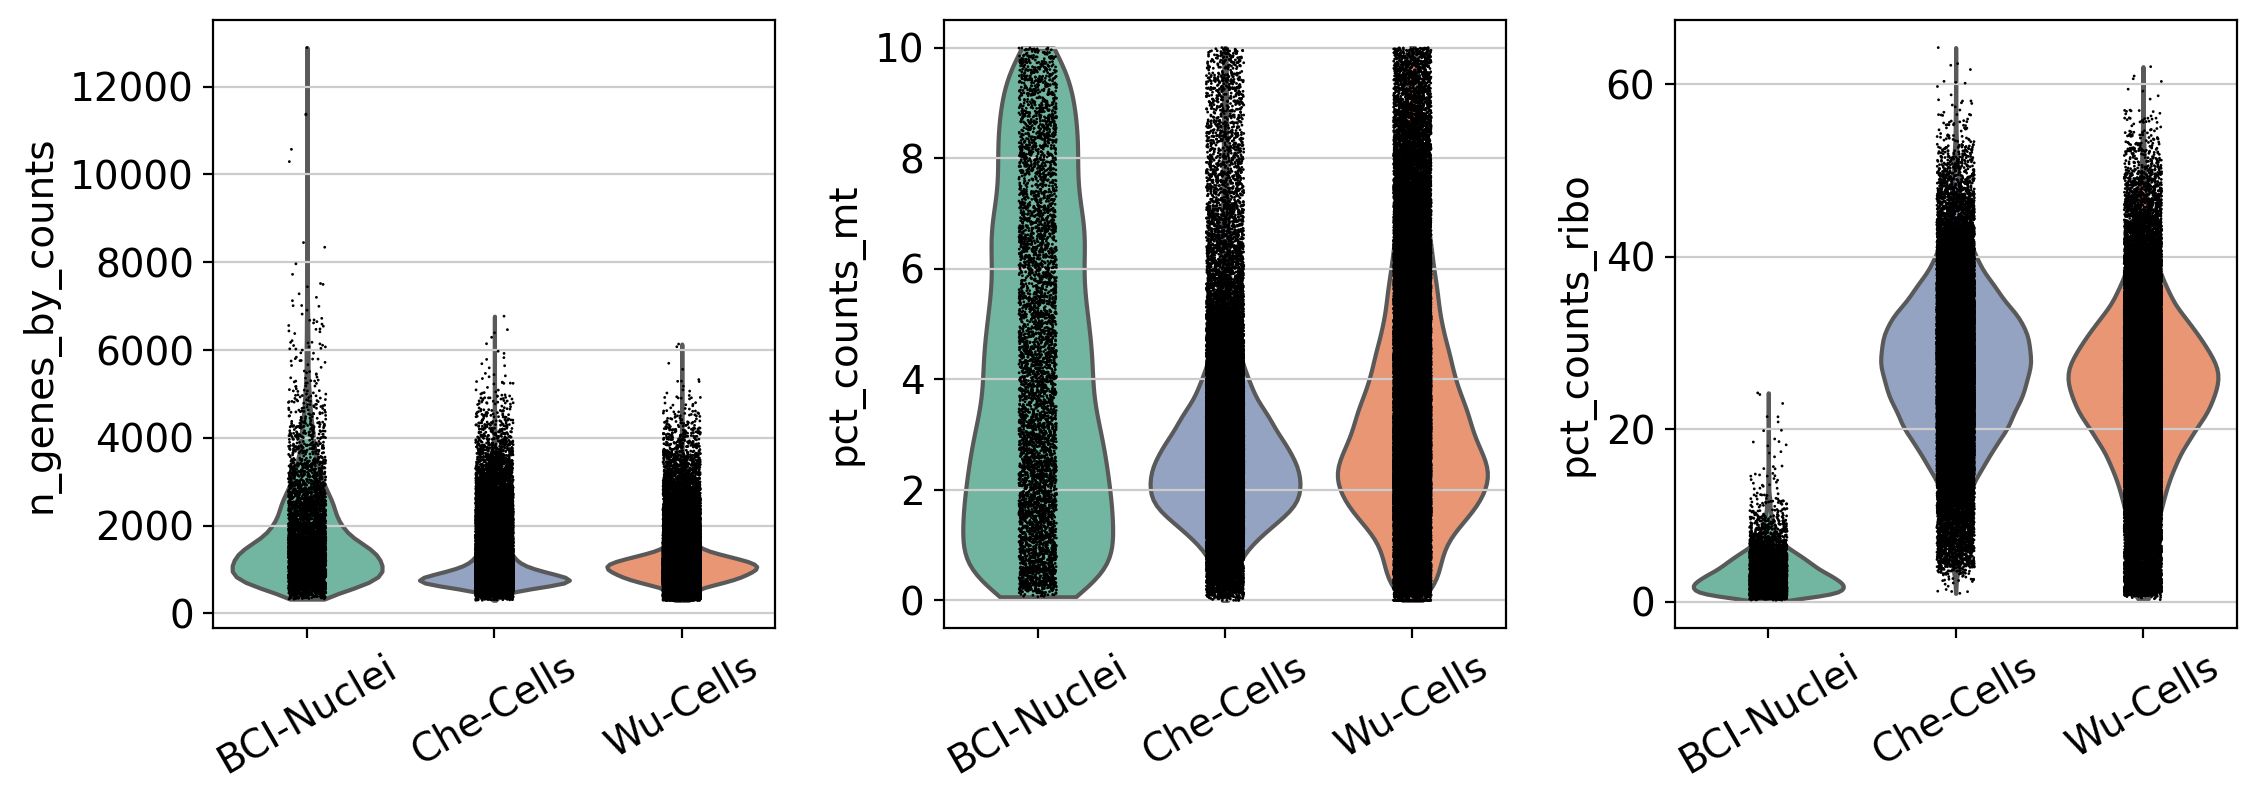

In [40]:
# violin plot of some distributions
sc.pl.violin(
    adata_liver,
    keys=["n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo"],
    groupby="cell_source",
    jitter=0.1,
    multi_panel=True,
    rotation=30,
    show=True,
    save="QC_covariates.pdf",
)

In [41]:
adata_liver

AnnData object with n_obs × n_vars = 107428 × 37102
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells'
    uns: 'cell_source_colors', 'Therapy_colors', 'Tissue_colors'

In [42]:
adata_liver.var.columns

Index(['n_cells'], dtype='object')

In [43]:
np.max(adata_liver.X)

40676.0

In [44]:
adata_liver.obs.describe()

,doublet_score,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
count,107428.000000,107428.000000,107428.000000,107428.000000,107428.000000
mean,0.131951,1167.935045,3586.978013,3.197704,24.637403
std,0.094447,636.007131,3721.472597,1.962241,10.052085
min,0.000011,300.000000,393.000000,0.000000,0.167926
25%,0.065868,778.000000,1856.000000,1.851313,19.126241
50%,0.110196,1006.000000,2542.000000,2.715964,25.555557
75%,0.173469,1321.000000,3734.000000,4.063880,31.217007
max,0.887500,12886.000000,114650.000000,9.998728,64.279480


In [45]:
adata_liver.var.describe()

,n_cells
count,37102.000000
mean,3138.863053
std,8530.433753
min,1.000000
25%,9.000000
50%,95.000000
75%,2007.750000
max,107236.000000


In [46]:
adata_liver.write(DIR2SAVE.joinpath("Multiome_Che_Wu_CRC_LM_raw.h5ad"))

### Check that the Patient names are all there 

In [47]:
len(set(adata_liver.obs.Patient))

41

In [48]:
(
    len(set(adata_multiome_format.obs.Patient))
    + len(set(adata_che2021_format.obs.Patient))
    + len(set(adata_wu2022_format.obs.Patient))
)

41

In [49]:
adata_liver.obs[adata_liver.obs.cell_source == "BCI-Nuclei"].describe()

,doublet_score,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
count,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000
mean,0.051087,1732.350234,3807.768195,4.271053,3.425424
std,0.090740,1123.329924,5029.480225,2.801661,2.479981
min,0.000011,328.000000,393.000000,0.063980,0.167926
25%,0.003176,950.000000,1413.000000,1.802403,1.659514
50%,0.015547,1421.000000,2394.000000,3.900310,2.879213
75%,0.050650,2216.000000,4525.000000,6.569759,4.586466
max,0.499039,12886.000000,114650.000000,9.991236,24.228466


In [50]:
adata_liver.obs[adata_liver.obs.cell_source == "Che-Cells"].describe()

,doublet_score,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
count,48954.000000,48954.000000,48954.000000,48954.000000,48954.000000
mean,0.130138,1114.685603,3742.758957,2.734939,27.261827
std,0.089690,628.722902,4046.672837,1.494021,8.328319
min,0.003717,302.000000,543.000000,0.000000,0.976928
25%,0.066362,726.000000,1826.000000,1.772331,21.721081
50%,0.107287,897.000000,2402.000000,2.452182,27.411117
75%,0.169231,1277.000000,3800.750000,3.329057,32.773592
max,0.887500,6770.000000,73441.000000,9.998728,64.279480


In [51]:
adata_liver.obs[adata_liver.obs.cell_source == "Wu-Cells"].describe()

,doublet_score,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
count,53129.000000,53129.000000,53129.000000,53129.000000,53129.000000
mean,0.141756,1160.217490,3421.226279,3.516120,24.353226
std,0.095077,540.413822,3211.869015,2.127156,9.385751
min,0.006440,300.000000,482.000000,0.000000,0.251256
25%,0.074597,849.000000,1941.000000,1.965409,18.923077
50%,0.120690,1066.000000,2679.000000,3.049302,24.947590
75%,0.181818,1301.000000,3662.000000,4.734369,30.244940
max,0.880795,6135.000000,64861.000000,9.997656,62.064404
